WARNING    Cannot use Cython, a test compilation failed: command 'cl.exe' failed: No such file or directory (CompileError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 0


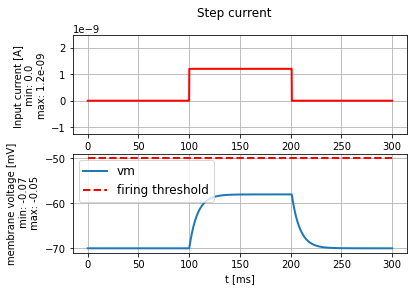

nr of spikes: 5


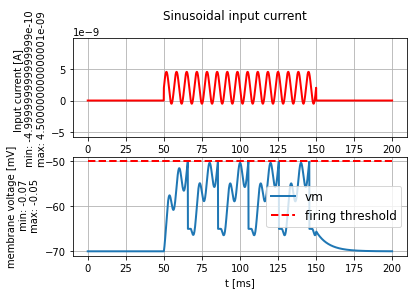

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

# b2.prefs.codegen.target = "cython"

LIF.getting_started()
LIF.print_default_parameters()

In [4]:
LIF.get_random_param_set()

[-35.838 * volt,
 -39.808 * volt,
 37.228 * volt,
 3.504 * Gohm,
 36.522 * second,
 211. * msecond]

In [10]:
# from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))
I_min = LIF.FIRING_THRESHOLD - LIF.V_REST
print(I_min)

resting potential: -0.07
20. mV


In [11]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

AssertionError: amplitude must have the dimension of current e.g. brian2.uamp